In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('E:\Fish.csv')

### Exploring the data

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

### In this describtion we notice that minimum weight is 0 so there may be something wrong

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### There is no null values ' so clean'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### But 'species' column type is object so we will make it category

In [7]:
df.Species=df.Species.astype('category')

### The three columns of length are a bit not obvious so we will pick them a proprit names

In [8]:
df.columns=['Species','Weight','Vertical_length','Diagonal_length','Cross_length','Height','Width']

## Here we are showing some basic statistics of weight for each species
### Pike, Bream and WhiteFish can do well in a big feast "
#### notice the zero again in Roach

In [9]:
des=df.groupby('Species').describe().T
des.loc['Weight',:]

Species,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,35.000000,11.000000,56.000000,17.000000,20.000000,14.000000,6.000000
mean,617.828571,154.818182,382.239286,718.705882,152.050000,11.178571,531.000000
std,209.205709,78.755086,347.617717,494.140765,88.828916,4.131526,309.602972
min,242.000000,55.000000,5.900000,200.000000,0.000000,6.700000,270.000000
25%,462.500000,105.000000,120.000000,345.000000,104.250000,8.950000,279.000000
50%,610.000000,145.000000,207.500000,510.000000,147.500000,9.850000,423.000000
75%,717.000000,185.000000,692.500000,950.000000,171.750000,12.200000,735.000000
max,1000.000000,300.000000,1100.000000,1650.000000,390.000000,19.900000,1000.000000


# Now let's dig deeper
## It seems that we have a lot of Perch in this data

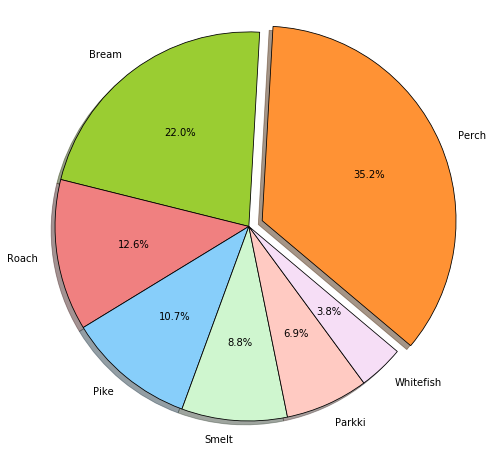

In [10]:
plt.figure(figsize=(8,8))
plt.pie(df['Species'].value_counts(),labels=df['Species'].value_counts().index,
        colors=['#ff9234', 'yellowgreen', 'lightcoral', 'lightskyblue','#cff6cf','#ffcac2','#f6def6'],
        explode = (0.075,0,0,0,0,0,0),
        wedgeprops={"edgecolor":"k",'linewidth': 0.8, 'linestyle': 'solid'},
        autopct='%1.1f%%', shadow=True, startangle=-40)
plt.axis('equal')
plt.show()

### The weight is right skewed and the most is close to zero 'very light'

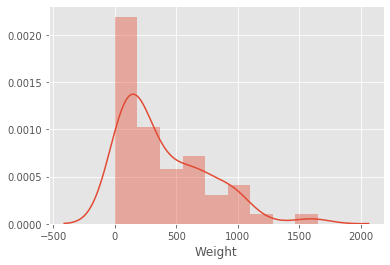

In [11]:
sns.distplot(df.Weight)

## There is an expected correlation between weight width and height but differs among species

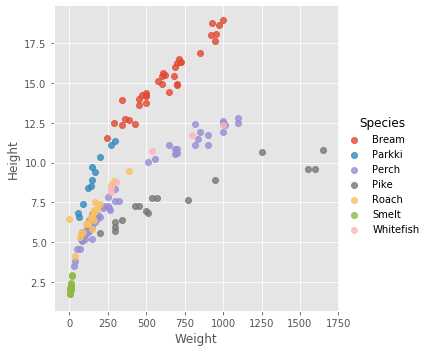

In [12]:
sns.lmplot(x='Weight',y='Height',hue='Species',data=df,fit_reg=False)
plt.show()

### There is some deviation in "Pike" which has a bit big weight but the width and height is proper so let's see the length 

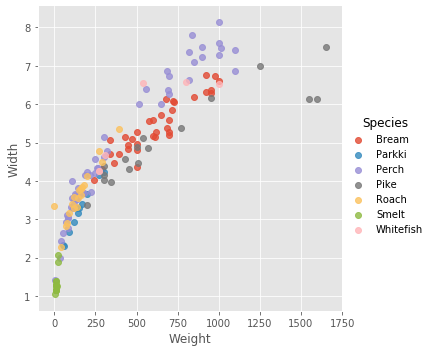

In [13]:
sns.lmplot(x='Weight',y='Width',hue='Species',data=df,fit_reg=False)
plt.show()

## It seems that Pike has a bigger length than the others which affects the weight

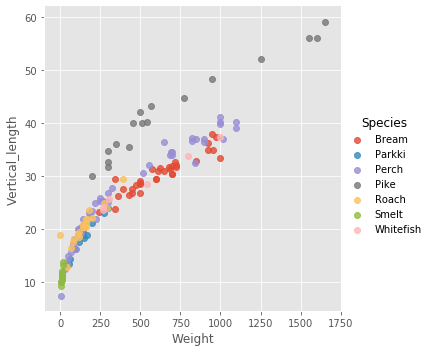

In [14]:
sns.lmplot(x='Weight',y='Vertical_length',hue='Species',data=df,fit_reg=False)
plt.show()

## Here we can see that 'Smelt' is about to zero and 'Roach' has an outlier so let's explore that

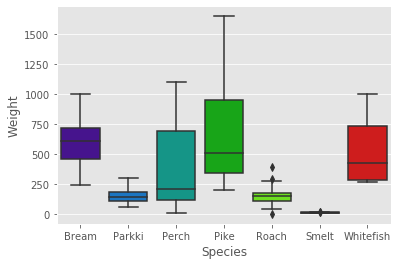

In [15]:
sns.boxplot(x=df['Species'],y=df['Weight'],palette='nipy_spectral')

## Okay, Smelt weight is very small actually all the features are small so that's fine
### " طلعت بسارية  "

In [16]:
df[df['Species']=='Smelt']

,Species,Weight,Vertical_length,Diagonal_length,Cross_length,Height,Width
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936


### Wrong value of course so we will drop it

In [17]:
df[df['Weight']==0]

,Species,Weight,Vertical_length,Diagonal_length,Cross_length,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [18]:
df.drop(index=40,inplace=True)

In [19]:
df=df.reset_index()
df.drop(columns='index',inplace=True)

### Let's take a look at the big weights and it seems all great no thing is wrong becaue the features are balanced

In [20]:
df[df['Weight']>=1000]

,Species,Weight,Vertical_length,Diagonal_length,Cross_length,Height,Width
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030
59,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
120,Perch,1015.0,37.0,40.0,42.4,12.3808,7.4624
122,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
123,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
124,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
125,Perch,1000.0,40.2,43.5,46.0,12.6040,8.1420
126,Perch,1000.0,41.1,44.0,46.6,12.4888,7.5958
140,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
141,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440


## I don't even know the difference between these lengths but they are about the same 

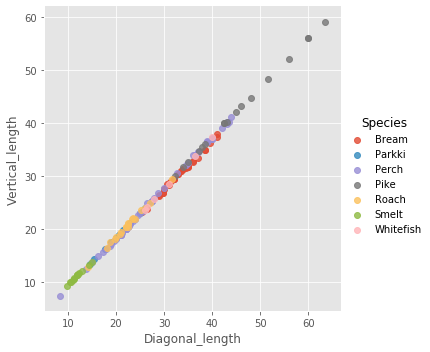

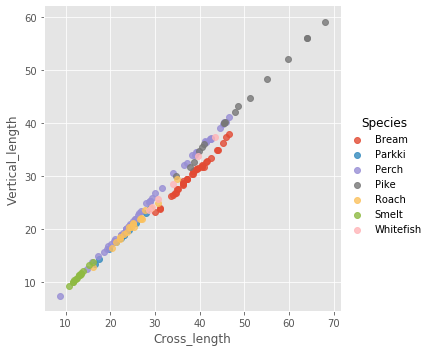

In [21]:
sns.lmplot(x='Diagonal_length',y='Vertical_length',hue='Species',data=df,fit_reg=False)
sns.lmplot(x='Cross_length',y='Vertical_length',hue='Species',data=df,fit_reg=False)
plt.show()

# Now let's prepare the data to implement the Linear Regression model to predict the weight
## we will start by encoding the species column

In [22]:
df['Species']=df['Species'].cat.codes

## We will make a heatmap to show the correlations  

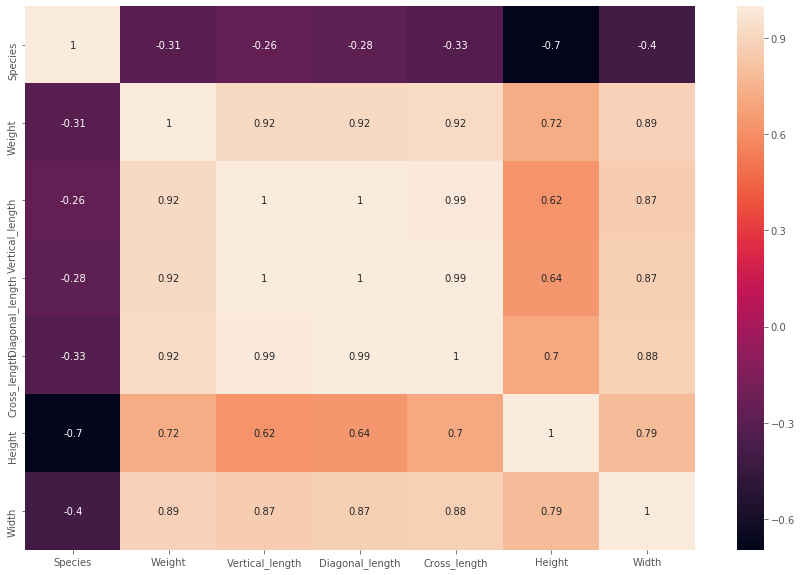

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

### Importing the model and splitting the data

In [24]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop(columns=['Weight'])

In [26]:
y=df['Weight']

### Splitting using train test split model

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
reg=LinearRegression()

## Training the model

In [29]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Here are the coefficients of the model equation

In [30]:
reg.coef_

array([ 30.0433091 ,  29.4985138 ,  36.45986153, -40.09468638,
        41.61534342,   3.97765763])

In [31]:
y_pred=reg.predict(x_test)

# And we get  92% accuracy "D

In [32]:
reg.score(x_test,y_test)

0.9237393073665114

## Let's try to scale the data 

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Preparing the pipeline 

In [34]:
steps=[('scaling',StandardScaler()),('regr',LinearRegression())]

In [35]:
pipeline=Pipeline(steps)

In [36]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## And we get the same accuracy but that's fine anyway ""

In [37]:
pipeline.score(x_test,y_test)

0.9237393073665116